In [3]:
cd drive/My\ Drive

[Errno 2] No such file or directory: 'drive/My Drive'
/content


In [4]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
import matplotlib.pyplot as plt
train_info = pd.read_csv("data.csv")


FileNotFoundError: ignored

https://www.kaggle.com/mahmudds/siim-isic-melanoma-classification

---


Some patients have many images

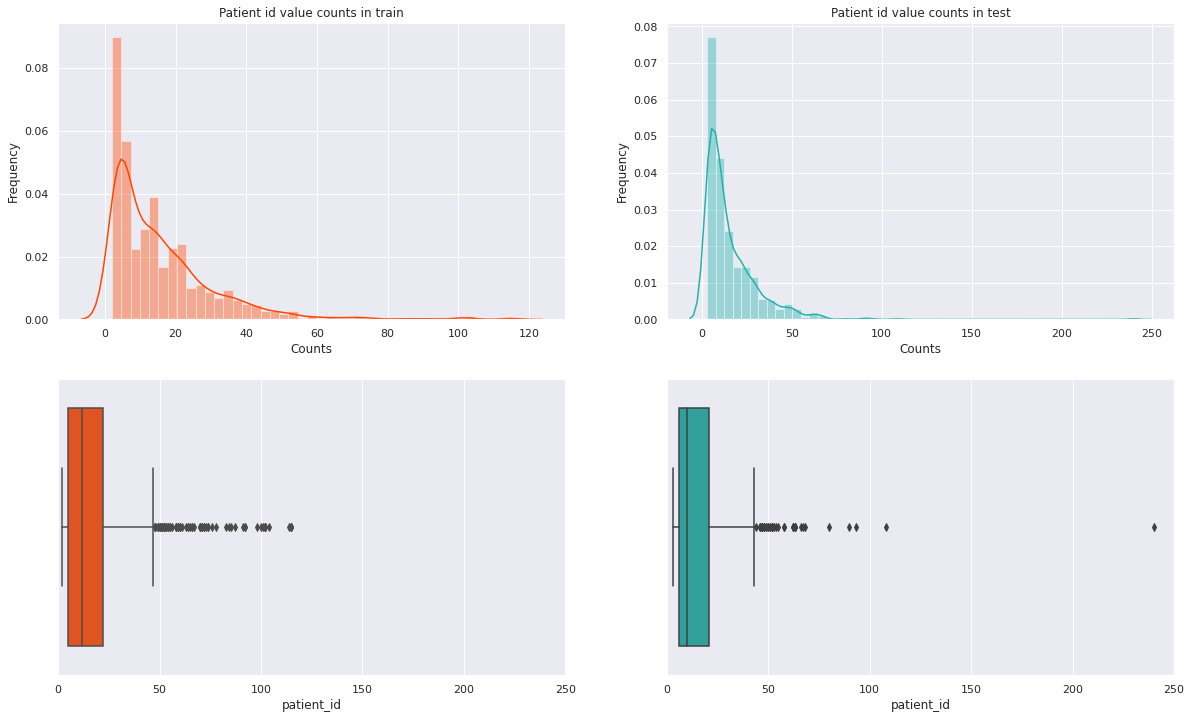



FileNotFoundError: ignored

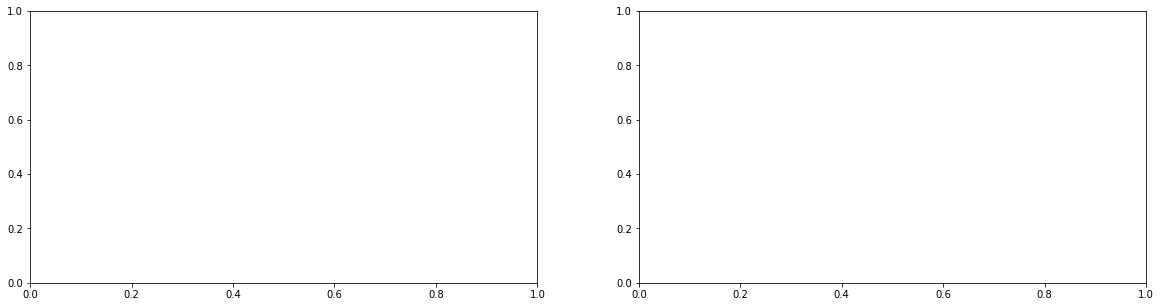

In [7]:
def draw(anatom_site_general_challenge_name, i):
  train_info = pd.read_csv("data.csv")

  image_locations_train = train_info.anatom_site_general_challenge.value_counts().sort_values(ascending=False)

  train_info = train_info[['anatom_site_general_challenge', 'target']]
  val_df = train_info[train_info['anatom_site_general_challenge'] == anatom_site_general_challenge_name] 

  targets_val_df = val_df.target.value_counts().sort_values(ascending=False)

  sns.barplot(x=targets_val_df.index.values, y=targets_val_df.values, ax=ax[i], color="orangered");
  ax[i].set_xlabel("");
  labels = ax[0].get_xticklabels();
  ax[i].set_xticklabels(labels, rotation=90);
  ax[i].set_title("Image class distrubition for anatom_site_general "+ anatom_site_general_challenge_name +" in train");

import pandas as pd
fig, ax = plt.subplots(1,2,figsize=(20,5))
i = 0
#draw("torso",i)
#draw("lower extremity",i+1)
#draw("upper extremity",i)
#draw("head/neck",i+1)
draw("palms/soles",i)
draw("oral/genital",i+1)


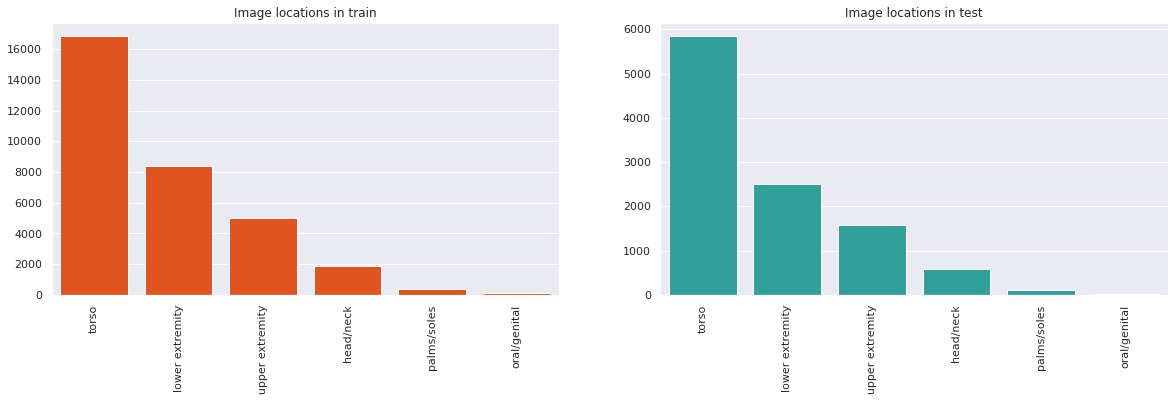

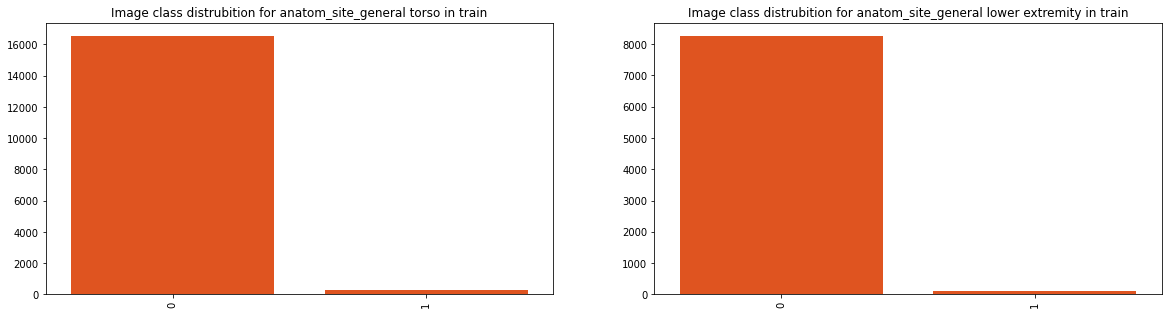

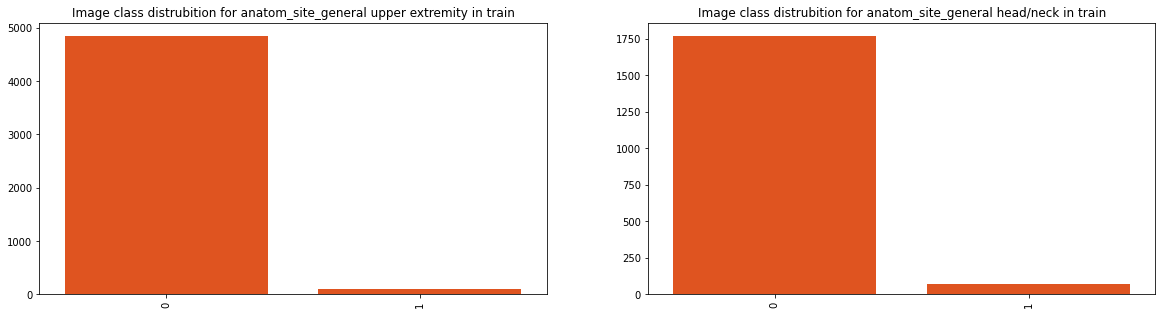

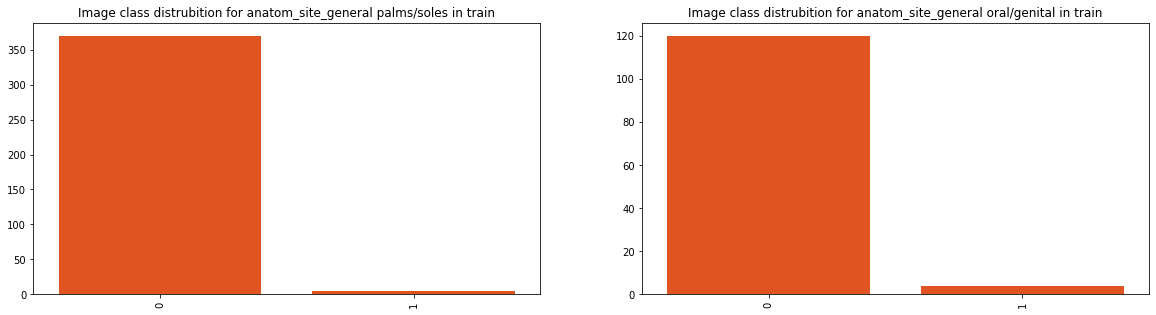

head/neck melanoma probability is higher than others

**KNN and random forest will be applied to dataset**

In [16]:
cd drive/My\ Drive

/content/drive/My Drive


In [17]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('data.csv', header = None) 
print("Data Shape:", data.shape) 
  
print(data.head()) 

Data Shape: (32532, 9)
     0             1           2  ...          6                 7       8
0  NaN    image_name  patient_id  ...  diagnosis  benign_malignant  target
1  0.0  ISIC_2637011  IP_7279968  ...    unknown            benign       0
2  1.0  ISIC_0015719  IP_3075186  ...    unknown            benign       0
3  2.0  ISIC_0052212  IP_2842074  ...      nevus            benign       0
4  3.0  ISIC_0068279  IP_6890425  ...    unknown            benign       0

[5 rows x 9 columns]


In [18]:
x_orig = data.iloc[:, 1:-1].values 
  
# Data labels 
y_orig = data.iloc[:, -1:].values 
  
print("Shape of Feature Matrix:", x_orig.shape) 
print("Shape Label Vector:", y_orig.shape) 


Shape of Feature Matrix: (32532, 7)
Shape Label Vector: (32532, 1)


In [19]:
print(data.head)
def columns_to_del(columns):
  for column in columns:
    del data[column]
delete_list = [0, 1, 2, 6, 7] 
#delete_list = [0, 1, 6, 7] 
columns_to_del(delete_list)


<bound method NDFrame.head of              0             1           2  ...          6                 7       8
0          NaN    image_name  patient_id  ...  diagnosis  benign_malignant  target
1          0.0  ISIC_2637011  IP_7279968  ...    unknown            benign       0
2          1.0  ISIC_0015719  IP_3075186  ...    unknown            benign       0
3          2.0  ISIC_0052212  IP_2842074  ...      nevus            benign       0
4          3.0  ISIC_0068279  IP_6890425  ...    unknown            benign       0
...        ...           ...         ...  ...        ...               ...     ...
32527  33121.0  ISIC_9999134  IP_6526534  ...    unknown            benign       0
32528  33122.0  ISIC_9999320  IP_3650745  ...    unknown            benign       0
32529  33123.0  ISIC_9999515  IP_2026598  ...    unknown            benign       0
32530  33124.0  ISIC_9999666  IP_7702038  ...    unknown            benign       0
32531  33125.0  ISIC_9999806  IP_0046310  ...      nevus 

In [20]:
data.drop([0], inplace=True)
print(data.head()) 


        3     4                5  8
1    male  45.0        head/neck  0
2  female  45.0  upper extremity  0
3  female  50.0  lower extremity  0
4  female  45.0        head/neck  0
5  female  55.0  upper extremity  0


In [21]:
res = data.copy()
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 
#features_to_encode = [2, 3, 5,]
features_to_encode = [3, 5]
for feature in features_to_encode:
    res = encode_and_bind(res, feature)
print(res)        

          4  8  3_female  ...  5_palms/soles  5_torso  5_upper extremity
1      45.0  0         0  ...              0        0                  0
2      45.0  0         1  ...              0        0                  1
3      50.0  0         1  ...              0        0                  0
4      45.0  0         1  ...              0        0                  0
5      55.0  0         1  ...              0        0                  1
...     ... ..       ...  ...            ...      ...                ...
32527  50.0  0         0  ...              0        1                  0
32528  65.0  0         0  ...              0        1                  0
32529  20.0  0         0  ...              0        0                  0
32530  50.0  0         0  ...              0        0                  0
32531  45.0  0         0  ...              0        1                  0

[32531 rows x 10 columns]


In [22]:
print(res)
X = res.loc[:, res.columns != 8]
y = res.iloc[:, 1].values
print(X)
print(y)

          4  8  3_female  ...  5_palms/soles  5_torso  5_upper extremity
1      45.0  0         0  ...              0        0                  0
2      45.0  0         1  ...              0        0                  1
3      50.0  0         1  ...              0        0                  0
4      45.0  0         1  ...              0        0                  0
5      55.0  0         1  ...              0        0                  1
...     ... ..       ...  ...            ...      ...                ...
32527  50.0  0         0  ...              0        1                  0
32528  65.0  0         0  ...              0        1                  0
32529  20.0  0         0  ...              0        0                  0
32530  50.0  0         0  ...              0        0                  0
32531  45.0  0         0  ...              0        1                  0

[32531 rows x 10 columns]
          4  3_female  3_male  ...  5_palms/soles  5_torso  5_upper extremity
1      45.0        

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [25]:
  from sklearn.preprocessing import StandardScaler

  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

In [26]:
def calculateError(y_test, y_pred):
  from sklearn.metrics import classification_report, confusion_matrix
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

In [27]:
def applyKNNAndCalculateError(X_train, y_train, X_test, y_test):
  from sklearn.neighbors import KNeighborsClassifier
  classifier = KNeighborsClassifier(n_neighbors=4)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("calculating for knn...")
  calculateError(y_test,y_pred)


In [28]:
applyKNNAndCalculateError(X_train,y_train,X_test,y_test)

calculating for knn...
[[6390    0]
 [ 117    0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6390
           1       0.00      0.00      0.00       117

    accuracy                           0.98      6507
   macro avg       0.49      0.50      0.50      6507
weighted avg       0.96      0.98      0.97      6507



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def KNNParameterVisualizer(X_train,X_test,y_train,y_test):
  error = []
  from sklearn.neighbors import KNeighborsClassifier
  print(X_train.shape[0])
  # Calculating error for K values between 1 and 10
  for i in range(1, 40):
      knn = KNeighborsClassifier(n_neighbors = 5)
      knn.fit(X_train, y_train)
      pred_i = knn.predict(X_test)
      error.append(np.mean(pred_i != y_test))
  plt.figure(figsize=(12, 6))
  plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',

          markerfacecolor='blue', markersize=10)

  plt.title('Error Rate K Value')

  plt.xlabel('K Value')

  plt.ylabel('Mean Error')

In [ ]:

KNNParameterVisualizer(X_train,X_test,y_train,y_test)

In [ ]:
from sklearn.externals import joblib 
def save_model(model):
  joblib.dump(model, 'knn_model.pkl') 


In [ ]:
def load_model():
    knn_from_joblib = joblib.load('knn_model.pkl')  
    y_pred = knn_from_joblib.predict(X_test)
    calculateError(y_test,y_pred)
load_model()

**RANDOM FOREST**

In [34]:
def applyRandomForestAndCalculateError(X_train, y_train, X_test, y_test):
  from sklearn.ensemble import RandomForestClassifier
  clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators = 500)
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  print("calculating random forest error")
  calculateError(y_test,y_pred)
  return clf

Test

In [35]:
clf = applyRandomForestAndCalculateError(X_train, y_train, X_test, y_test)
applyKNNAndCalculateError(X_train, y_train, X_test, y_test)

calculating random forest error
[[6390    0]
 [ 117    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6390
           1       0.00      0.00      0.00       117

    accuracy                           0.98      6507
   macro avg       0.49      0.50      0.50      6507
weighted avg       0.96      0.98      0.97      6507

calculating for knn...
[[6390    0]
 [ 117    0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6390
           1       0.00      0.00      0.00       117

    accuracy                           0.98      6507
   macro avg       0.49      0.50      0.50      6507
weighted avg       0.96      0.98      0.97      6507



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_imp)

4                    0.582043
5_head/neck          0.179001
3_male               0.092928
3_female             0.090536
5_lower extremity    0.021193
5_torso              0.017107
5_upper extremity    0.010425
5_oral/genital       0.004452
5_palms/soles        0.002314
dtype: float64


No handles with labels found to put in legend.


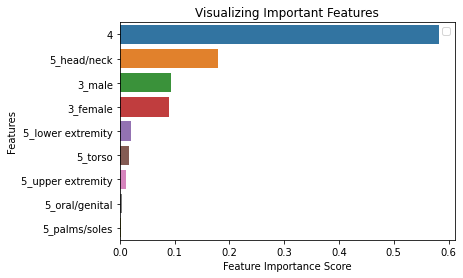

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

**Create another models with reduced columns**

In [39]:
res_2 = res.copy()
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X_reduced = res_2[[4, '5_head/neck','3_female', '3_male', '5_torso','5_upper extremity']]  # Removed feature "sepal length"
y_reduced = res_2[8]                                       
# Split dataset into training set and test set
print(X_reduced)
print(y_reduced)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X, y_reduced, test_size=0.70, random_state=5) # 70% training and 30% test

          4  5_head/neck  3_female  3_male  5_torso  5_upper extremity
1      45.0            1         0       1        0                  0
2      45.0            0         1       0        0                  1
3      50.0            0         1       0        0                  0
4      45.0            1         1       0        0                  0
5      55.0            0         1       0        0                  1
...     ...          ...       ...     ...      ...                ...
32527  50.0            0         0       1        1                  0
32528  65.0            0         0       1        1                  0
32529  20.0            0         0       1        0                  0
32530  50.0            0         0       1        0                  0
32531  45.0            0         0       1        1                  0

[32531 rows x 6 columns]
1        0
2        0
3        0
4        0
5        0
        ..
32527    0
32528    0
32529    0
32530    0
32531    0
N

In [40]:
print("features reduced")
applyRandomForestAndCalculateError(X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced)
applyKNNAndCalculateError(X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced)

features reduced
calculating random forest error
[[22366     0]
 [  406     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22366
           1       0.00      0.00      0.00       406

    accuracy                           0.98     22772
   macro avg       0.49      0.50      0.50     22772
weighted avg       0.96      0.98      0.97     22772

calculating for knn...
[[22365     1]
 [  404     2]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22366
           1       0.67      0.00      0.01       406

    accuracy                           0.98     22772
   macro avg       0.82      0.50      0.50     22772
weighted avg       0.98      0.98      0.97     22772

